In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import datetime 
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

In [3]:
stock_data = pd.read_csv(r"C:\Users\Tsi\Desktop\10academy\.gitignore\raw_analyst_ratings.csv")

In [8]:
print(stock_data)

         Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \
0        https://www.benzinga.

In [9]:
stock_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [28]:
stock_data.tail()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,publication_date,publication_day,publication_time
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX,38,NaN,NaT,NaN,NaT
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX,52,NaN,NaT,NaN,NaT
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX,56,NaN,NaT,NaN,NaT
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX,54,NaN,NaT,NaN,NaT
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,NaT,ZX,81,NaN,NaT,NaN,NaT


In [10]:
stock_data.shape

(1407328, 6)

In [32]:
symbols = stock_data["stock"].unique()

In [33]:
len(symbols)

6204

In [34]:
symbols[:15]

array(['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
       'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL'], dtype=object)

<h1>Descriptive Statistics</h1>

In [11]:
stock_data['headline_length'] = stock_data['headline'].apply(len)
headline_stats = stock_data['headline_length'].describe()
print('Headline Length Statistics:')
print(headline_stats)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [14]:
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce')
stock_data['year'] = stock_data['date'].dt.year

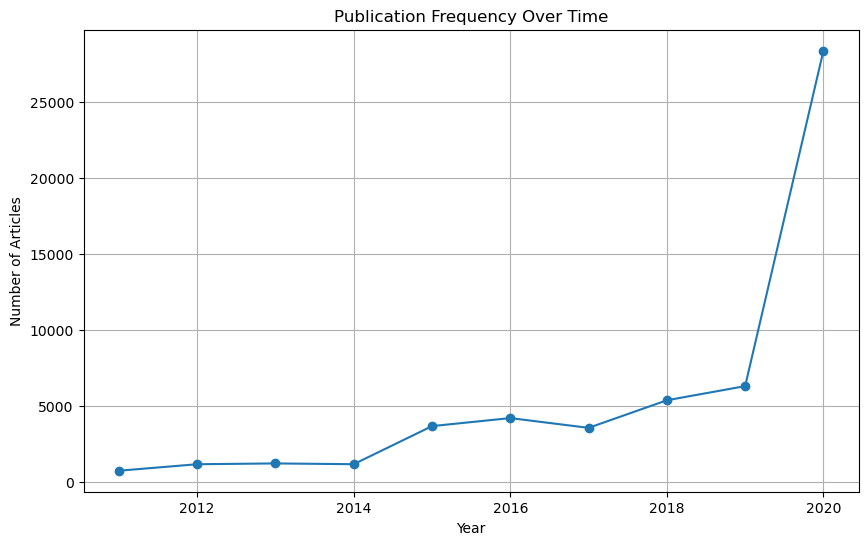

In [16]:
plt.figure(figsize=(10, 6))
stock_data.groupby('year').size().plot(kind='line', marker='o')
plt.title('Publication Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

<h1>Time Series Analysis:</h1>

In [18]:
stock_data['date'] = pd.to_datetime(stock_data['date'], errors='coerce')
stock_data['year'] = stock_data['date'].dt.year

In [20]:
## Publication date trends
stock_data['publication_date'] = pd.to_datetime(stock_data['date'])
stock_data['publication_day'] = stock_data['publication_date'].dt.day_name()
publication_trends = stock_data.groupby('publication_day').size()

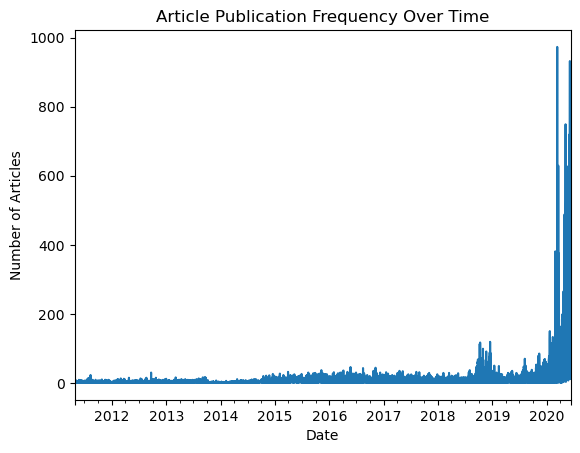

In [21]:
# Time Series Analysis
## Publication frequency over time
stock_data['publication_date'] = pd.to_datetime(stock_data['publication_date'])
stock_data['publication_time'] = stock_data['publication_date'].dt.time
stock_data.set_index('publication_date').resample('D').size().plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

<h1>Publisher Analysis:</h1>


In [26]:
#all publishers
total_articles_per_publisher = stock_data['publisher'].value_counts()
print(total_articles_per_publisher)

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


In [24]:
##top publishers
articles_per_publisher = stock_data.groupby('publisher').size().reset_index(name='article_count')
most_active_publishers = articles_per_publisher.sort_values(by='article_count', ascending=False).head(5)
print("\nMost Active Publishers:")
print(most_active_publishers)


Most Active Publishers:
             publisher  article_count
686      Paul Quintaro         228373
532         Lisa Levin         186979
96   Benzinga Newsdesk         150484
169      Charles Gross          96732
622      Monica Gerson          82380


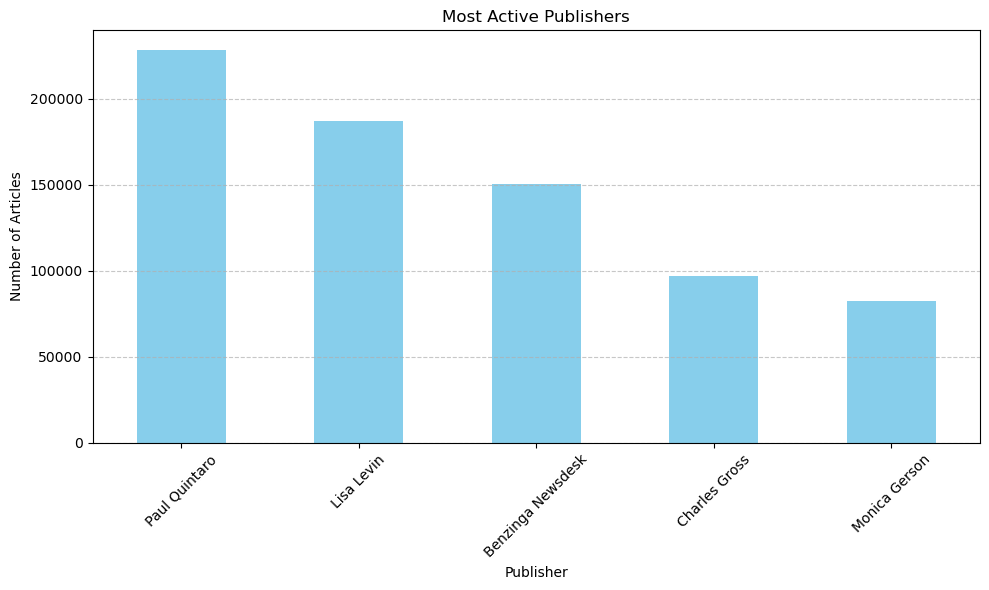

In [27]:
## Most active publishers
articles_per_publisher = stock_data['publisher'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
articles_per_publisher.head().plot(kind='bar', color='skyblue')
plt.title('Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h1>Text Analysis(Sentiment analysis & Topic Modeling):</h1>


In [38]:
# Ensure you have the necessary NLP libraries and datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tsi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Tsi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
stock_data['sentiment'] = stock_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [8]:
stock_data['sentiment_type'] = stock_data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


In [14]:
count_vect = CountVectorizer(max_features=1000, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(stock_data['headline'])

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

In [ ]:
words = count_vect.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Top words #{i}:")
    print([words[i] for i in topic.argsort()[-10:]])
    print("\n")